## Name : Sangamesh
## Mail id : sangupatil648@gmail.com

### Assignment  - 4

## simple linear reggression - salary data

## 1) Delivery_time -> Predict delivery time using sorting time 
## 2) Salary_hike -> Build a prediction model for Salary_hike

## ------------------------------------------------------------

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [142]:
data = pd.read_csv("Salary_Data (1).csv")

In [143]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [145]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [146]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [147]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [148]:
data[data.duplicated()].shape

(0, 2)

In [149]:
data_cleaned1 = data.drop_duplicates()

In [150]:
data_cleaned1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [151]:
data_cleaned1.shape

(30, 2)

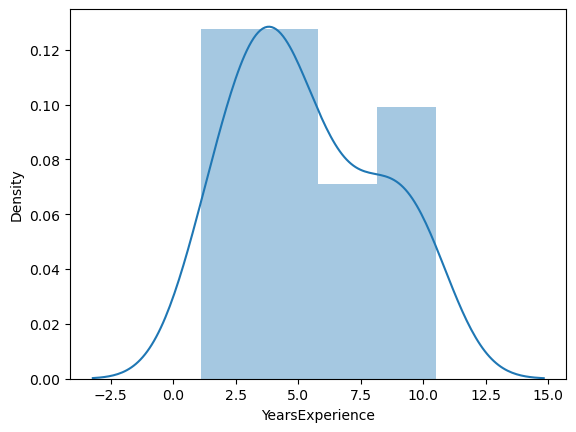

In [152]:
# visualization
sns.distplot(data['YearsExperience'])
plt.show()

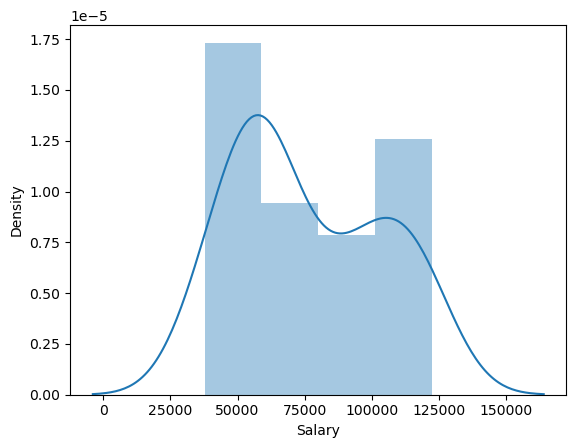

In [153]:
sns.distplot(data['Salary'])
plt.show()

<AxesSubplot:>

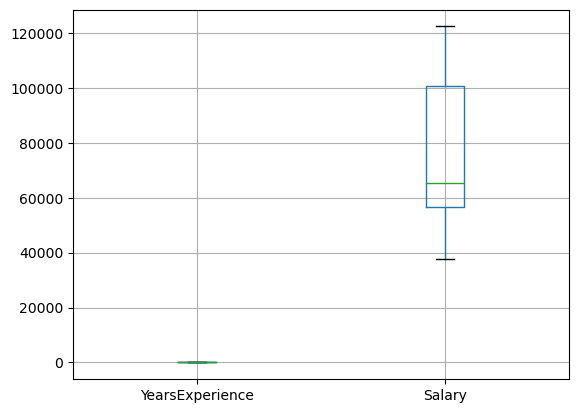

In [184]:
data.boxplot()

In [154]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

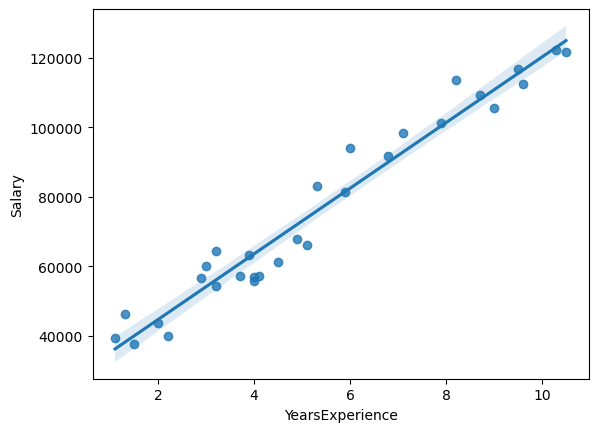

In [155]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

In [165]:
model=smf.ols("Salary~YearsExperience", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        14:34:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [167]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [168]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [170]:
model1=smf.ols("Salary~np.log(YearsExperience)", data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        14:36:01   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [174]:
model1.tvalues,model1.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64,
 Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [176]:
model1.rsquared,model1.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [161]:
pagar = (25792.200199) + (9449.962321)*(3)
pagar

54142.087162

In [139]:
newdata = pd.Series([5,8])
newdata

0    5
1    8
dtype: int64

In [178]:
data_pred = pd.DataFrame(newdata,columns=['Years , Experience'])
data_pred

,"Years , Experience"
0,5
1,8


In [182]:
c=float(input('Enter the Years of Experience:'))
sal=pd.Series([c])
sa_pred=pd.DataFrame(sal,columns=["YearsExperience"])
d=model.predict(sa_pred)
print("salary :",d)

Enter the Years of Experience:5
salary : 0    73042.011806
dtype: float64


In [185]:
c=float(input('Enter the Years of Experience:'))
sal=pd.Series([c])
sa_pred=pd.DataFrame(sal,columns=["YearsExperience"])
d=model.predict(sa_pred)
print("salary :",d)

Enter the Years of Experience:8
salary : 0    101391.89877
dtype: float64


In [186]:
c=float(input('Enter the Years of Experience:'))
sal=pd.Series([c])
sa_pred=pd.DataFrame(sal,columns=["YearsExperience"])
d=model.predict(sa_pred)
print("salary :",d)

Enter the Years of Experience:12
salary : 0    139191.748056
dtype: float64
